In [175]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [176]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "hotel_booking.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mojtaba142/hotel-booking",
  file_path,
)


In [177]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [178]:
df.drop(columns=["name",'email','phone-number','credit_card'],inplace=True)

In [179]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [181]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [182]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [183]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [184]:
df.drop(columns=['agent','company'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [185]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407360
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


# Data Analysis and Visualization

In [186]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
cancelled_perc

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64

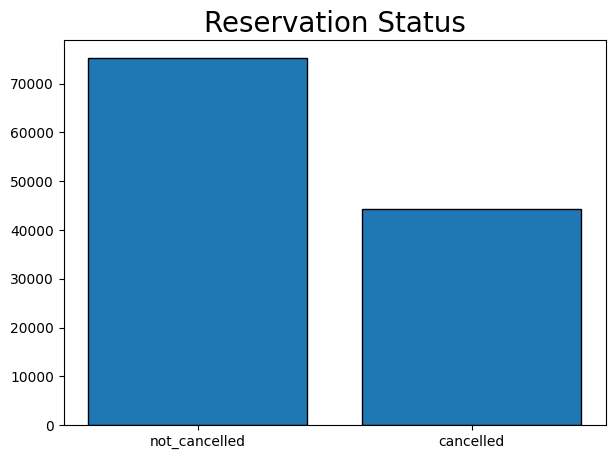

In [187]:
plt.figure(figsize=(7,5))
plt.title('Reservation Status',fontsize=20)
plt.bar(['not_cancelled','cancelled'],df['is_canceled'].value_counts(),edgecolor='black')
plt.show()


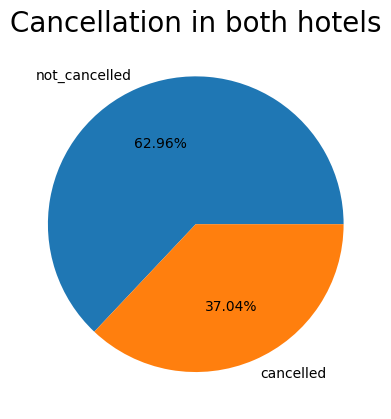

In [188]:
size0 = cancelled_perc.loc[0]*100
size1 = cancelled_perc.loc[1]*100
sizes=[size0,size1]
plt.title('Cancellation in both hotels',fontsize=20)
plt.pie(sizes,labels=['not_cancelled','cancelled'],autopct='%.2f%%')
plt.show()

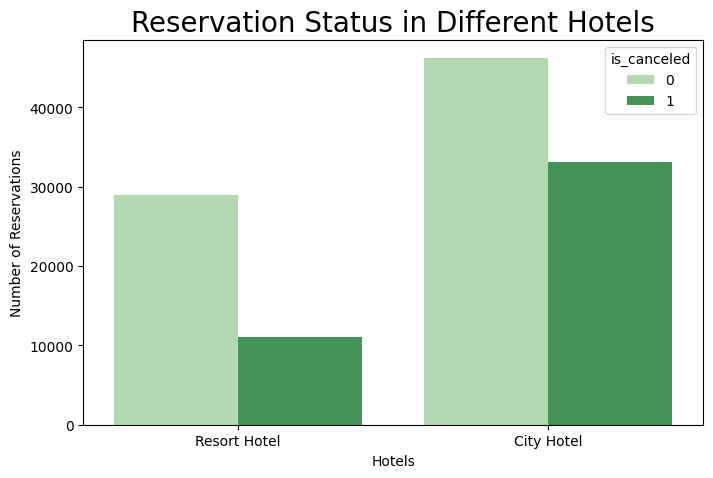

In [189]:
plt.figure(figsize=(8,5))
sns.countplot(x='hotel',hue='is_canceled',data=df, palette='Greens')
plt.title('Reservation Status in Different Hotels',fontsize=20)
plt.xlabel('Hotels')
plt.ylabel('Number of Reservations')
plt.show()

In [190]:
resort_hotel = df[df['hotel']=='Resort Hotel']
city_hotel = df[df['hotel']=='City Hotel']

In [191]:
resort_hotel_perc = resort_hotel['is_canceled'].value_counts(normalize=True)
resort_hotel_perc

is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [192]:
city_hotel_perc = resort_hotel['is_canceled'].value_counts(normalize=True)
city_hotel_perc

is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

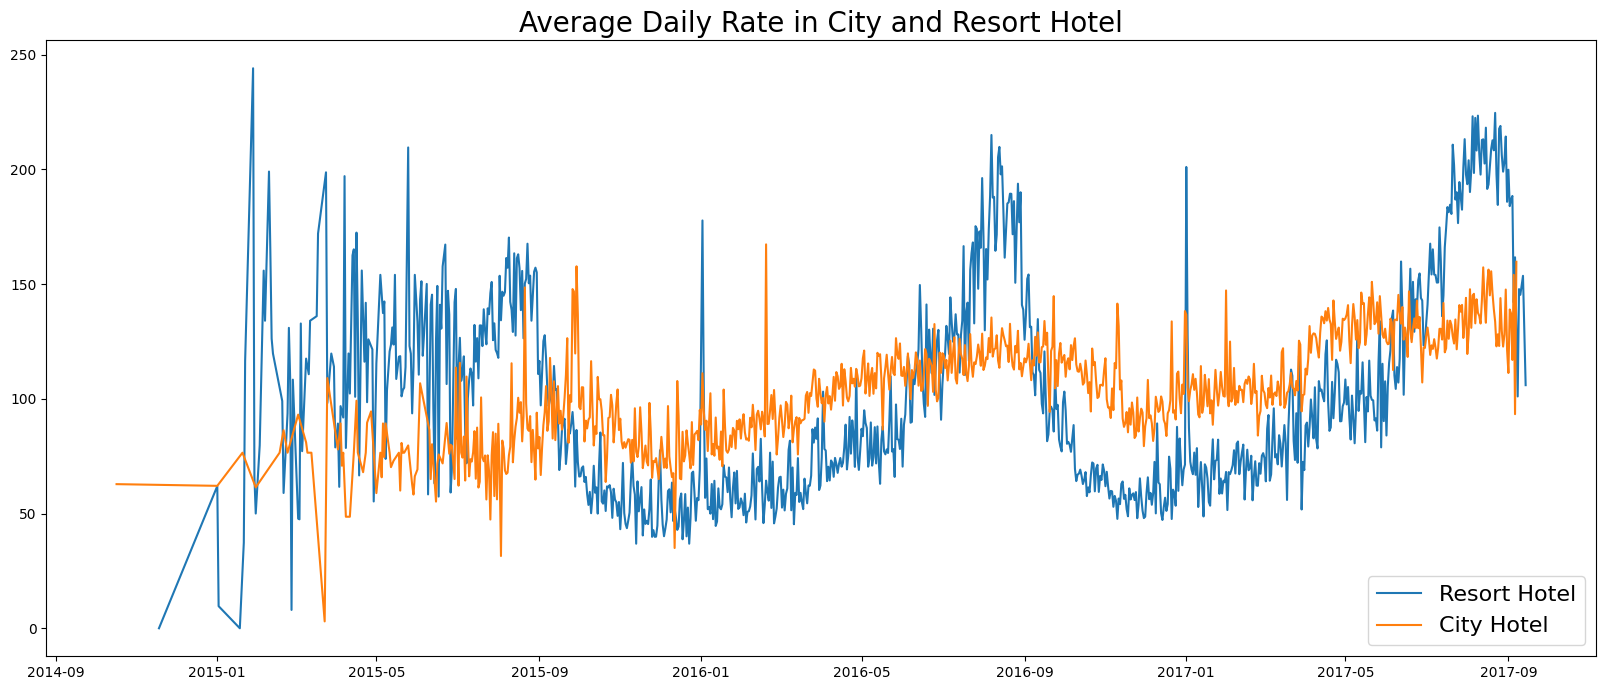

In [193]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City and Resort Hotel',fontsize=20)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.legend(loc="lower right",fontsize=16)
plt.show()

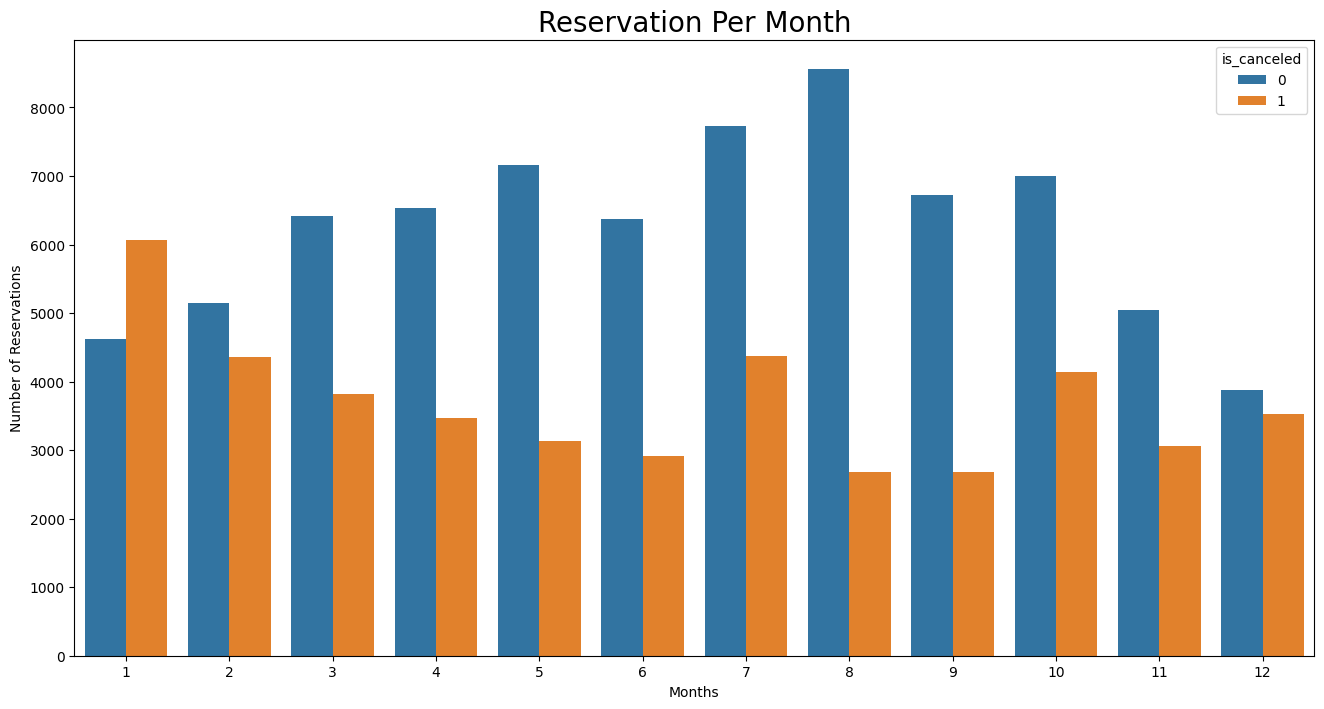

In [194]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
sns.countplot(x='month',hue='is_canceled',data=df)
plt.title('Reservation Per Month',fontsize=20)
plt.xlabel('Months')
plt.ylabel('Number of Reservations')
plt.show()

In [195]:
data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index()
data

,month,adr
0,1,571261.17
1,2,453315.76
2,3,424985.36
3,4,425413.23
4,5,391438.08
5,6,359688.89
6,7,482430.62
7,8,325786.93
8,9,275528.33
9,10,331156.87


Text(0.5, 1.0, 'Average Daily Rate Per Month')

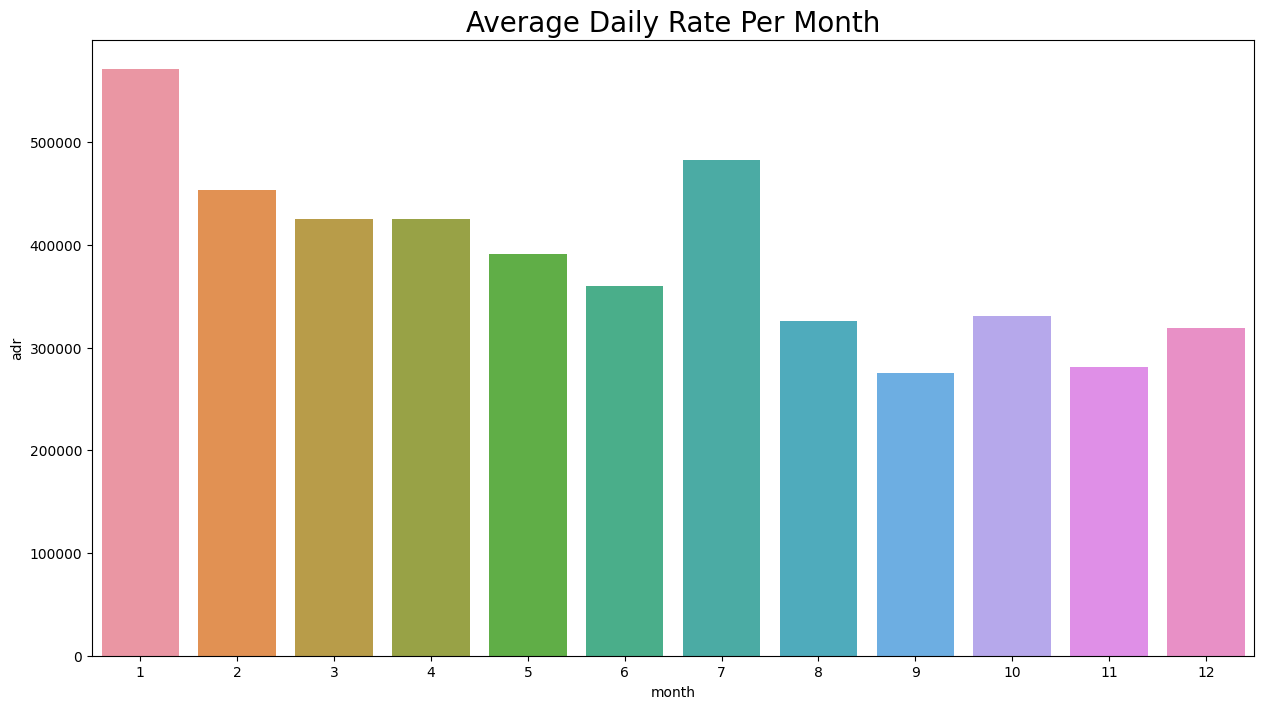

In [196]:
plt.figure(figsize=(15,8))
sns.barplot(x='month',y='adr', data = df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.title('Average Daily Rate Per Month',fontsize=20)

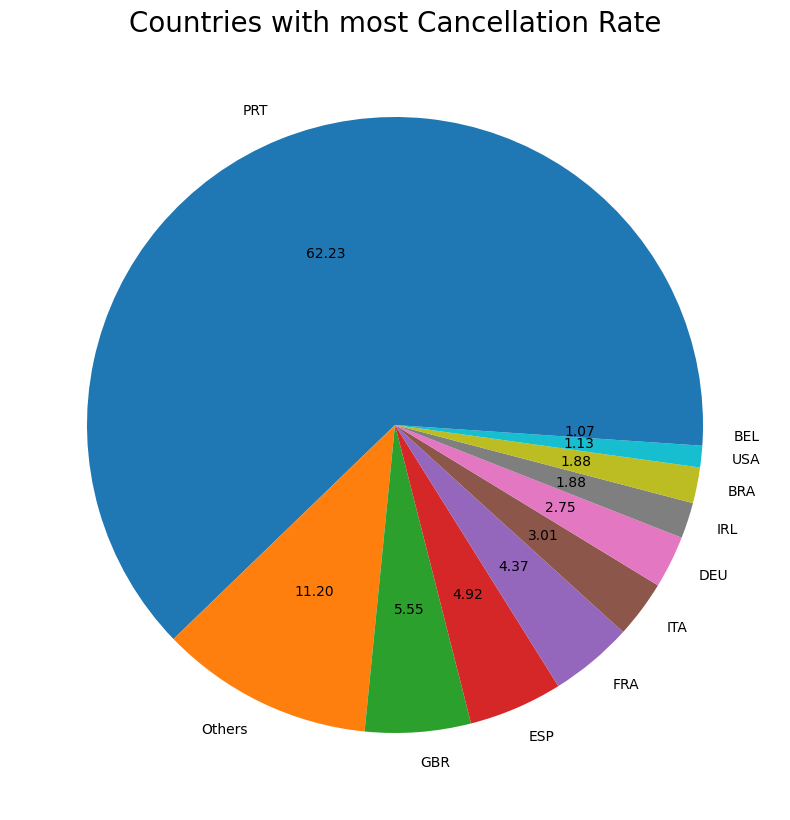

In [197]:
cancelled_data = df[df['is_canceled']==1]
countries = df['country'].value_counts(normalize=True)
top_10_countries = cancelled_data['country'].value_counts(normalize=True)[:10]
cancelled_data['country'] = cancelled_data['country'].apply(lambda x: x if x in top_10_countries else "Others")
countries_perc = cancelled_data['country'].value_counts(normalize=True)
plt.figure(figsize=(12,10))
plt.title('Countries with most Cancellation Rate',fontsize=20)
plt.pie(countries_perc, labels=countries_perc.index,autopct='%.2f')
plt.show()

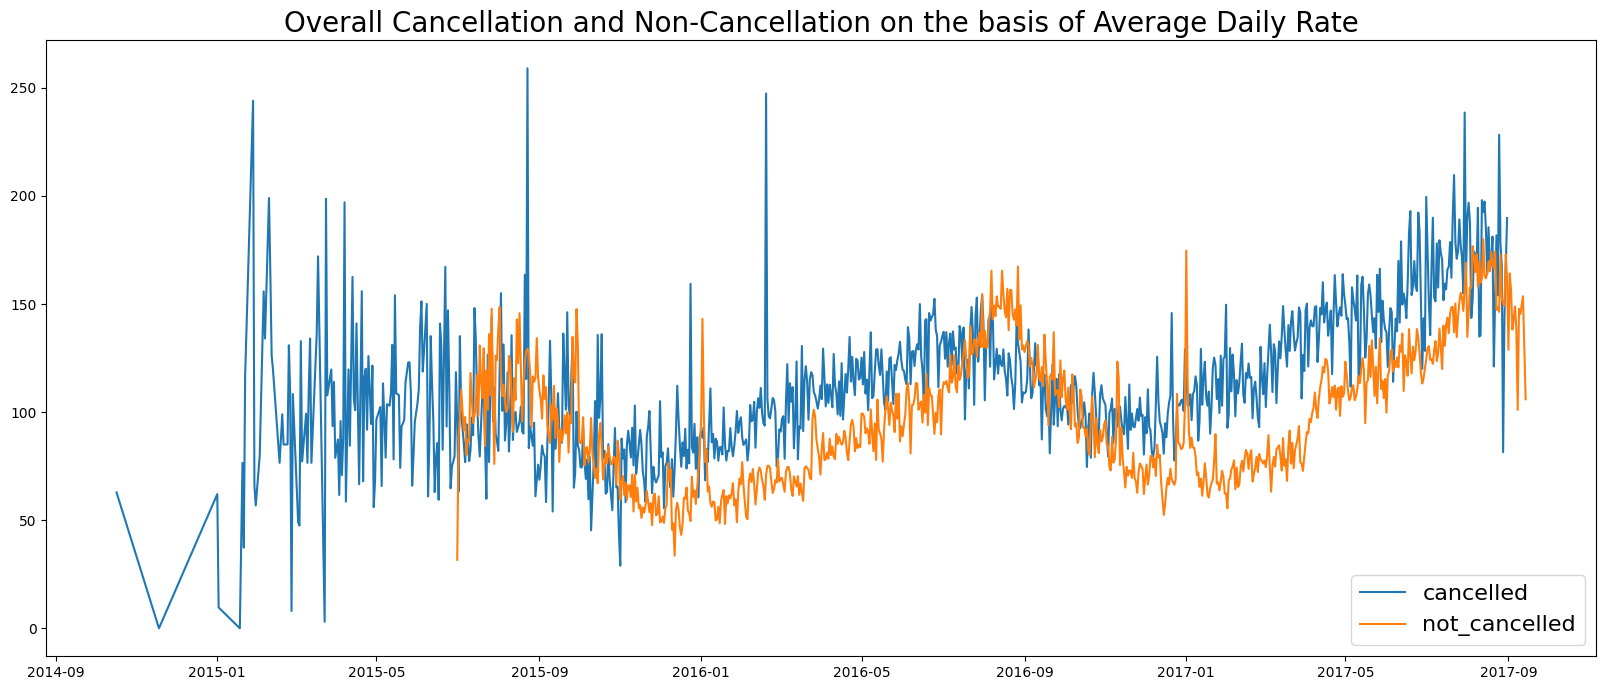

In [198]:
cancelled_data = df[df['is_canceled']==1]
not_cancelled_data = df[df['is_canceled']==0]
cancelled_data = cancelled_data.groupby('reservation_status_date')[['adr']].mean().reset_index()
cancelled_data.sort_values('reservation_status_date',inplace=True)
not_cancelled_data = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean().reset_index()
not_cancelled_data.sort_values('reservation_status_date',inplace=True)
plt.figure(figsize=(20,8))
plt.title('Overall Cancellation and Non-Cancellation on the basis of Average Daily Rate',fontsize=20)
plt.plot(cancelled_data['reservation_status_date'],cancelled_data['adr'],label='cancelled')
plt.plot(not_cancelled_data['reservation_status_date'],not_cancelled_data['adr'],label='not_cancelled')
plt.legend(loc='lower right',fontsize=16)
plt.show()

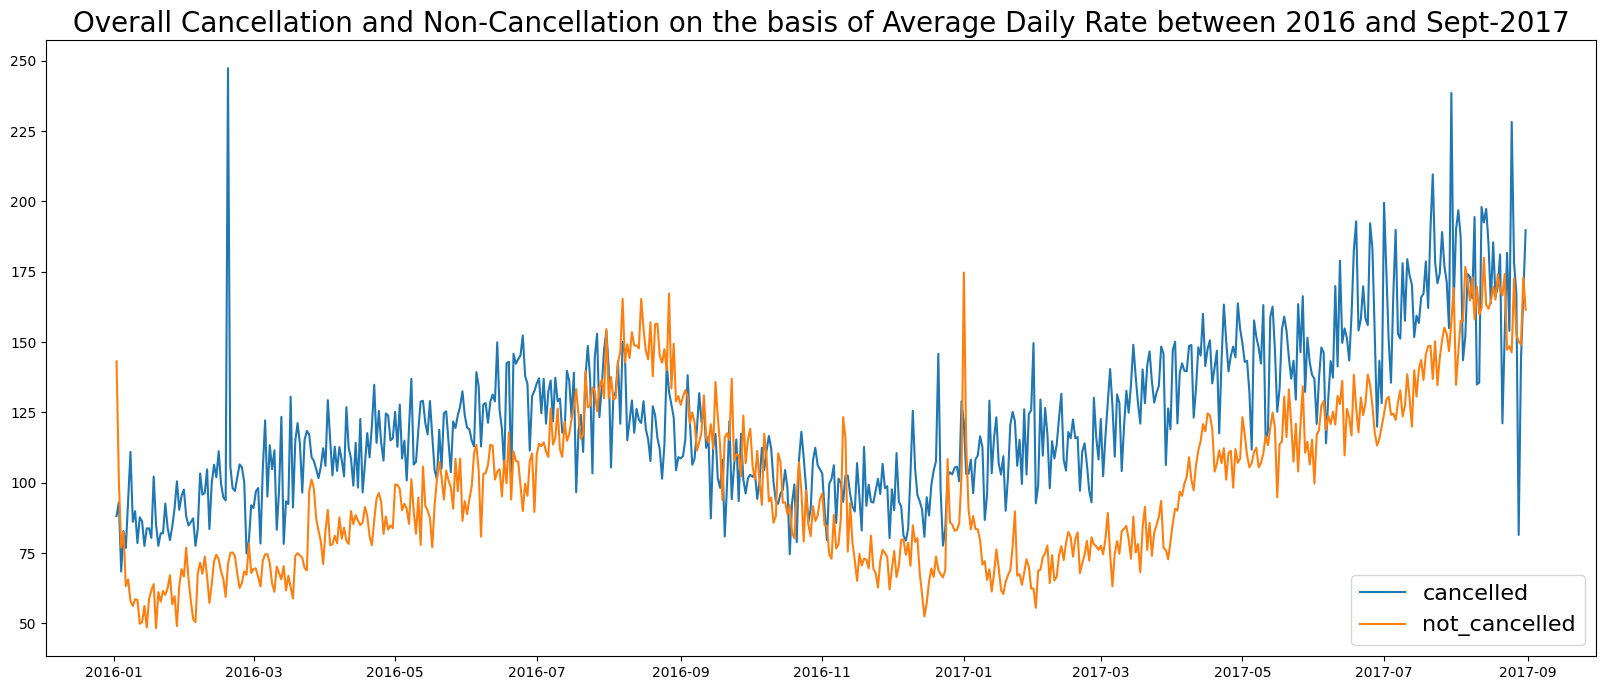

In [199]:
cancelled_data = cancelled_data[(cancelled_data['reservation_status_date']>'2016')&(cancelled_data['reservation_status_date']<'2017-09')]
not_cancelled_data = not_cancelled_data[(not_cancelled_data['reservation_status_date']>'2016')&(not_cancelled_data['reservation_status_date']<'2017-09')]
plt.figure(figsize=(20,8))
plt.title('Overall Cancellation and Non-Cancellation on the basis of Average Daily Rate between 2016 and Sept-2017',fontsize=20)
plt.plot(cancelled_data['reservation_status_date'],cancelled_data['adr'],label='cancelled')
plt.plot(not_cancelled_data['reservation_status_date'],not_cancelled_data['adr'],label='not_cancelled')
plt.legend(loc='lower right',fontsize=16)
plt.show()

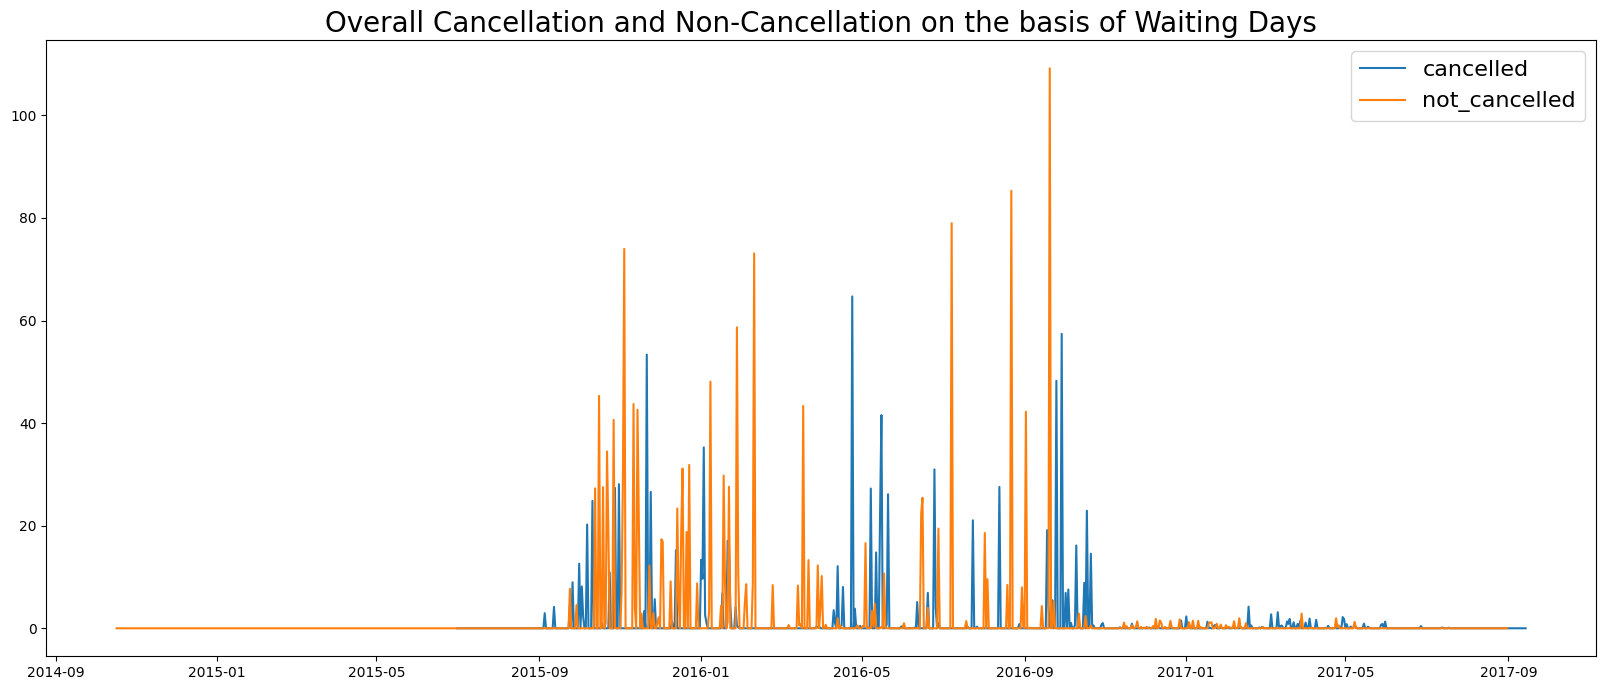

In [200]:
cancelled_data = cancelled.groupby('reservation_status_date')[['days_in_waiting_list']].mean().reset_index()
not_cancelled_data = not_cancelled.groupby('reservation_status_date')[['days_in_waiting_list']].mean().reset_index()
cancelled_data.sort_values('reservation_status_date',inplace=True)
not_cancelled_data.sort_values('reservation_status_date',inplace=True)
plt.figure(figsize=(20,8))
plt.title('Overall Cancellation and Non-Cancellation on the basis of Waiting Days',fontsize=20)
plt.plot(cancelled_data['reservation_status_date'],cancelled_data['days_in_waiting_list'],label='cancelled')
plt.plot(not_cancelled_data['reservation_status_date'],not_cancelled_data['days_in_waiting_list'],label='not_cancelled')
plt.legend(loc='upper right',fontsize=16)
plt.show()